### Installation Instructions
#### 1. Download Anaconda for Windows or Mac: https://docs.continuum.io/anaconda/install
#### 2. Clone cpe480 project from github: https://github.com/smannan/cpe480
#### 3. Go to Anaconda Navigator and select 'Launch Jupyter Notebook'
#### 4. Once in Jupyter, go to cloned repository
#### 5. Open Demo notebook

In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import ensemble

In [2]:
COLS_EXCLUDE = ['Median Sale Price','Region','neighborhood',
                'location','city','property_type','state',
                'Month of Period End', 'Median_Sale_Price_Bin', 'neighborhood_num',
                'Month of Period End', 'Unamed: 0', 'Median Sale Price MoM', 'Median Sale Price YoY']

TRAIN_DATA = 'san_jose_property.csv'
TEST_DATA = 'san_jose_properties_2017.csv'

### Load data

In [3]:
# %load Plot_Functions
import matplotlib.pyplot as plt

def plot_two_scatterplot(x, y, title='', xlabel='', ylabel=''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y[0], c='r')
    plt.scatter(x, y[1], c='b')
    plt.xlim(0, len(y[1]))
    plt.show();

In [4]:
total = pd.read_csv(TRAIN_DATA)
forest_df_2017 = pd.read_csv(TEST_DATA)

### Jan 2017 Predicted Price

In [5]:
X = total.loc[:, total.columns.difference(COLS_EXCLUDE)]
Y = total.loc[:, 'Median Sale Price']

r_forest = ensemble.RandomForestRegressor(n_estimators=80, max_depth=344, oob_score=True)
X_test = forest_df_2017.loc[:, forest_df_2017.columns.difference(COLS_EXCLUDE)]
Y_test = forest_df_2017.loc[:, 'Median Sale Price']

r_forest.fit(X, Y)
Y_pred, Y_test = (r_forest.predict(X_test), Y_test)

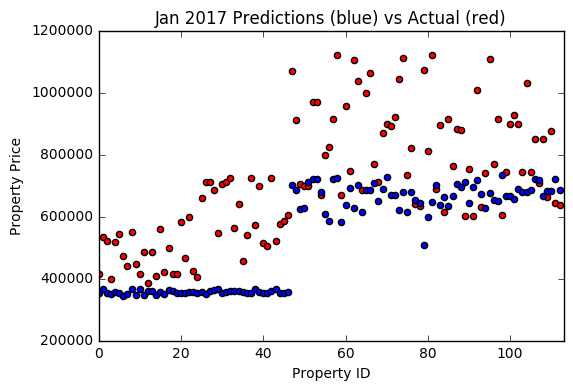

In [6]:
plot_two_scatterplot(range(len(Y_test)), [Y_test, Y_pred], title='Jan 2017 Predictions (blue) vs Actual (red)',
                ylabel='Property Price', xlabel='Property ID')

### Top 5 most expensive neighborhoods to buy a condo in Jan 2017

In [79]:
X_2017 = forest_df_2017.copy().drop(['Unnamed: 0'], 1)
X_2017['Median Sale Price Predicted'] = Y_pred
X_2017 = X_2017[X_2017.property_type == 'townhouse']

df1 = X_2017.sort_values(by=['Median Sale Price Predicted'], ascending=False) \
   .loc[:,['neighborhood', 'Median Sale Price Predicted']].head(5).neighborhood

pred = X_2017[X_2017.neighborhood.isin(df1)] \
    .loc[:,['Median Sale Price', 'Median Sale Price Predicted', 'neighborhood']]

pred['% Difference'] = 100*(pred['Median Sale Price'] - pred['Median Sale Price Predicted'])/(pred['Median Sale Price'])

In [81]:
pred 

,Median Sale Price,Median Sale Price Predicted,neighborhood,% Difference
28,685000,361500.0,branham-kirk,47.226277
29,546000,365587.5,brigadoon,33.042582
33,563000,361125.0,cherrywood,35.857016
38,572000,364887.5,east,36.208479
43,520000,366887.5,oak,29.444712


### Top 5 most affordable places to buy a condo in Jan 2017

In [84]:
X_2017 = forest_df_2017.copy().drop(['Unnamed: 0'], 1)
X_2017['Median Sale Price Predicted'] = Y_pred
X_2017 = X_2017[X_2017.property_type == 'condo']

df1 = X_2017.sort_values(by=['Median Sale Price Predicted'], ascending=True) \
    .loc[:,['neighborhood', 'Median Sale Price Predicted']].head(5).neighborhood
    
pred = X_2017[X_2017.neighborhood.isin(df1)] \
    .loc[:,['Median Sale Price', 'Median Sale Price Predicted', 'neighborhood']]

pred['% Difference'] = 100*(pred['Median Sale Price'] - pred['Median Sale Price Predicted'])/(pred['Median Sale Price'])

In [85]:
pred

,Median Sale Price,Median Sale Price Predicted,neighborhood,% Difference
6,471000,343212.5,cambrian-pioneer,27.131104
9,446000,347762.5,cherrywood,22.026345
11,487000,347275.0,flickinger,28.690965
14,407000,347875.0,hammer,14.527027
16,422000,349737.5,kenwood,17.123815
